<a href="https://colab.research.google.com/github/Shradzz-2111/Music-Genre-Classifier/blob/main/MusicGenreClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
nltk.download('words')
nltk.download("popular")
nltk.download('stopwords')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading 

True

In [ ]:
lyr_data= pd.read_csv('/content/drive/MyDrive/Dataset/unprocessed_lyrics.txt',error_bad_lines = False)

<ipython-input-4-f0f444f52d3f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  lyr_data= pd.read_csv('/content/drive/MyDrive/Dataset/unprocessed_lyrics.txt',error_bad_lines = False)


In [ ]:
lyr_data.head(6)

,SName,Lyric,Genre,Artist,lyric_length
0,W.A.Y.S,At forty-four minutes to four. An angel walked...,Hip Hop,Jhene Aiko,361
1,Two Wrongs,Intro:. (Wyclef). I'm just sittin' here playin...,Hip Hop,Wyclef Jean,550
2,Triumphant (Get 'em),"Get 'em, get 'em, get 'em. Hit 'em, hit 'em, h...",Hip Hop,Meek Mill,599
3,St. Tropez,Roll up and smoke my sins away. I'd like to go...,Hip Hop,J. Cole,259
4,G-Unit Soldiers,"f/ Lloyd Banks, Tony Yayo (G-Unit). [Tony Yayo...",Hip Hop,50 Cent,528
5,Gucci Gucci,[Sample]. One big room full of bad bitches. [H...,Hip Hop,Kreayshawn,375


In [ ]:
lyr_data.isnull().sum()

SName           0
Lyric           0
Genre           0
Artist          0
lyric_length    0
dtype: int64

<Axes: >

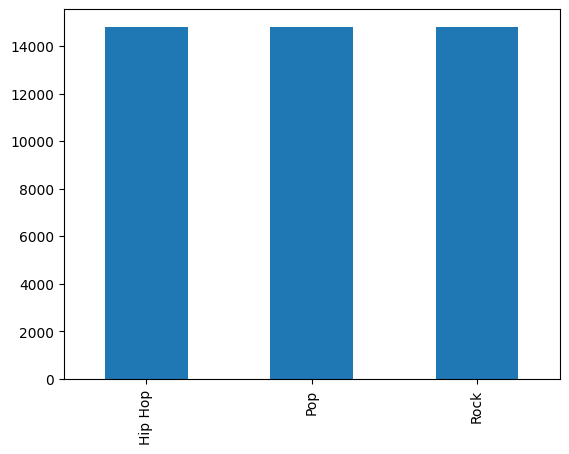

In [ ]:
lyr_data['Genre'].value_counts().plot.bar()

In [ ]:
lyr_data['Genre'].value_counts()

Hip Hop    14796
Pop        14796
Rock       14796
Name: Genre, dtype: int64

In [ ]:
genre_num={'Rock':0, 'Pop':1 , 'Hip Hop':2}
lyr_final=lyr_data.applymap(lambda x: genre_num.get(x) if x in genre_num else x)
lyr_final=lyr_final.drop(['lyric_length'],axis=1)
lyr_final

,SName,Lyric,Genre,Artist
0,W.A.Y.S,At forty-four minutes to four. An angel walked...,2,Jhene Aiko
1,Two Wrongs,Intro:. (Wyclef). I'm just sittin' here playin...,2,Wyclef Jean
2,Triumphant (Get 'em),"Get 'em, get 'em, get 'em. Hit 'em, hit 'em, h...",2,Meek Mill
3,St. Tropez,Roll up and smoke my sins away. I'd like to go...,2,J. Cole
4,G-Unit Soldiers,"f/ Lloyd Banks, Tony Yayo (G-Unit). [Tony Yayo...",2,50 Cent
...,...,...,...,...
44383,Rock This Town,Well my baby and me went out late Saturday nig...,0,Stray Cats
44384,On The Other Side,I'm tired of everyone I know. Of everyone I se...,0,The Strokes
44385,Kentucky Rain,Seven lonely days. And a dozen towns ago. I re...,0,Elvis Presley
44386,Stranger Things Have Happened,Goddamn this dusty room. This hazy afternoon. ...,0,Foo Fighters


In [ ]:
lyr_final['Lyric']=lyr_final['Lyric'].str.replace("[-\?.,\/#!$%\^&\*;:{}=\_~()]",' ')
lyr_final['Lyric']=lyr_final['Lyric'].str.replace("\[(.*?)\]",' ')
lyr_final['Lyric']=lyr_final['Lyric'].str.replace("' | '",' ')
lyr_final['Lyric']=lyr_final['Lyric'].str.replace('x[0-9]+',' ')

lyr_final=lyr_final[~lyr_final['Lyric'].str.contains(r'[^\x00-\x7F]+')]
lyr_final=lyr_final[lyr_final['Lyric'].str.strip()!='']

stop=stopwords.words('english')
lyr_final['Lyric']=lyr_final['Lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def lemma(text,flag=True):
  l_text=text.split()
  if flag == True:
    lem=nltk.stem.wordnet.WordNetLemmatizer()
    l_text=[lem.lemmatize(word) for word in l_text]
  text=" ".join(l_text)
  return text

lyr_final['Lyric']=lyr_final['Lyric'].apply(lambda x: lemma(x))
lyr_final


<ipython-input-10-4c3e04e99f4f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  lyr_final['Lyric']=lyr_final['Lyric'].str.replace("[-\?.,\/#!$%\^&\*;:{}=\_~()]",' ')
<ipython-input-10-4c3e04e99f4f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lyr_final['Lyric']=lyr_final['Lyric'].str.replace("\[(.*?)\]",' ')
<ipython-input-10-4c3e04e99f4f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lyr_final['Lyric']=lyr_final['Lyric'].str.replace("' | '",' ')
<ipython-input-10-4c3e04e99f4f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  lyr_final['Lyric']=lyr_final['Lyric'].str.replace('x[0-9]+',' ')


,SName,Lyric,Genre,Artist
0,W.A.Y.S,At forty four minute four An angel walked door...,2,Jhene Aiko
1,Two Wrongs,Intro Wyclef I'm sittin playin guitar claudett...,2,Wyclef Jean
2,Triumphant (Get 'em),Get em get em get em Hit em hit em hit em Get ...,2,Meek Mill
3,St. Tropez,Roll smoke sin away I'd like go St Tropez Mayb...,2,J. Cole
4,G-Unit Soldiers,f Lloyd Banks Tony Yayo G Unit Yea Lloyd Banks...,2,50 Cent
...,...,...,...,...
44382,FEELS LIKE,I feel sadness From I said I'm drinking forgiv...,0,Uriah Heep
44383,Rock This Town,Well baby went late Saturday night I hair pile...,0,Stray Cats
44384,On The Other Side,I'm tired everyone I know Of everyone I see On...,0,The Strokes
44385,Kentucky Rain,Seven lonely day And dozen town ago I reached ...,0,Elvis Presley


In [ ]:
lyr_data['Genre'].value_counts()


Hip Hop    14796
Pop        14796
Rock       14796
Name: Genre, dtype: int64

In [ ]:
lyr_final['Genre'].value_counts()

0    13585
1    13494
2    13257
Name: Genre, dtype: int64

Spliting Data into Training and test set


In [ ]:
from sklearn.model_selection import train_test_split
training_set, testing_set = train_test_split(lyr_final, test_size=0.3, random_state=42)

In [ ]:
training_set.reset_index()
testing_set.reset_index()

,index,SName,Lyric,Genre,Artist
0,23886,Kill 'Em With Kindness,The world nasty place You know I know yeah We ...,1,Selena Gomez
1,7063,Just a Little (feat. Range),I wanna think All day long I wanna dream Girl ...,2,Tinie Tempah
2,40236,Back Where I Belong,Got back wall Tried scream there's sound I'm s...,0,Sum 41
3,10440,The Motto (feat. Lil Wayne),I'm fuckin man get ya Type money everybody act...,2,Drake
4,7594,Playboy,Aw man I get raw please Y'all ready main event...,2,Lloyd Banks
...,...,...,...,...,...
12096,43527,Always Somewhere,Arrive seven place feel good No time call toda...,0,Scorpions
12097,22434,Oh Lord,I wanna life anymore I'm always fucking tired ...,1,Jessie J
12098,15817,How Is The Fashion,Do think fashion Think twice talk When happens...,1,Eduardo Leveck
12099,35322,Thief In The Night,I could talk hour hear word Your opinion make ...,0,Cliff Richard


In [ ]:
x_tr,y_tr= training_set['Lyric'].values, training_set['Genre'].values
x_tt,y_tt= testing_set['Lyric'].values,testing_set['Genre'].values

In [ ]:
def max_len(lyr):
  max_length=0
  for row in lyr['Lyric']:
    max_length=max(len(row.split(" ")),max_length)
  return max_length

maxi=max_len(training_set)
maxi

2066

In [ ]:
def one_hot_encoder(genre):
  if genre == 0:
    return [1,0,0]
  elif genre == 1:
    return [0,1,0]
  else:
    return [0,0,1]

genres= training_set['Genre'].tolist()
y_tr= [one_hot_encoder(genre) for genre in genres]

genres= testing_set['Genre'].tolist()
y_tt= [one_hot_encoder(genre) for genre in genres]



In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(x_tr))

x_tr_seq= tokenizer.texts_to_sequences(x_tr)
x_tt_seq= tokenizer.texts_to_sequences(x_tt)

x_tr_seq= pad_sequences(x_tr_seq,maxlen=maxi)
x_tt_seq = pad_sequences(x_tt_seq,maxlen=maxi)




In [ ]:
embeddings=dict()
file=open('/content/drive/MyDrive/Dataset/glove.6B.300d.txt')
for row in file:
  values=row.split()
  word=values[0]
  coeffs= np.asarray(values[1:],dtype='float32')
  embeddings[word]=coeffs
file.close()
print(f'Loaded {len(embeddings)} word vectors')
sizeofvocab=len(tokenizer.word_index)+1
print(sizeofvocab)

Loaded 400000 word vectors
72876


In [ ]:
matrix= np.zeros((sizeofvocab,300))

for word,i in tokenizer.word_index.items():
  vector=embeddings.get(word)
  if vector is not None:
    matrix[i]=vector

In [ ]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

In [ ]:
model=Sequential()

#embedding layer
model.add(Embedding(sizeofvocab,300,weights=[matrix],input_length=maxi,trainable=False))

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])

#Print summary of model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2066, 300)         21862800  
                                                                 
 lstm_1 (LSTM)               (None, 2066, 128)         219648    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 22090899 (84.27 MB)
Trainable params: 228099 (891.01 KB)
Non-trainable params: 21862800 (83.40 MB)
_______

In [ ]:
history = model.fit( np.array(x_tr_seq), np.array(y_tr), batch_size=128, epochs=5, validation_data=(np.array(x_tt_seq),np.array(y_tt)))


Epoch 1/5
221/221 [==============================] - 2916s 13s/step - loss: 0.7411 - accuracy: 0.6436 - val_loss: 0.6517 - val_accuracy: 0.7032
Epoch 2/5
221/221 [==============================] - 2892s 13s/step - loss: 0.6303 - accuracy: 0.7117 - val_loss: 0.6213 - val_accuracy: 0.7194
Epoch 3/5
221/221 [==============================] - 2897s 13s/step - loss: 0.5818 - accuracy: 0.7396 - val_loss: 0.6041 - val_accuracy: 0.7244
Epoch 4/5
221/221 [==============================] - 2903s 13s/step - loss: 0.5418 - accuracy: 0.7612 - val_loss: 0.5859 - val_accuracy: 0.7375
Epoch 5/5
221/221 [==============================] - 2907s 13s/step - loss: 0.4984 - accuracy: 0.7830 - val_loss: 0.5713 - val_accuracy: 0.7494


In [ ]:
pred= model.predict(np.array(x_tt_seq))

379/379 [==============================] - 605s 2s/step


In [ ]:
from numpy import argmax
predictions= [argmax(x) for x in pred]
final=["Rock","Pop","Hip Hop"]

In [ ]:
import matplotlib.pyplot as plot
import numpy as np
import itertools

# Arguments
#     ---------
#     cm:           confusion matrix from sklearn.metrics.confusion_matrix

#     final: given classification classes such as [0, 1, 2]
#                   the class names, for example: ['high', 'medium', 'low']

#     title:        the text to display at the top of the matrix

#     cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
#                   see http://matplotlib.org/examples/color/colormaps_reference.html
#                   plot.get_cmap('jet') or plot.cm.Blues

#     normalize:    If False, plot the raw numbers
#                   If True, plot the proportions
def confus_matrix(cm,final,title='Confusion matrix',cmap=None,normalize=True):
  accuracy=np.trace(cm)/np.sum(cm).astype('float')
  # print(np.trace(cm))
  # print(np.sum(cm))
  misclass= 1 - accuracy
  if cmap is None:
    cmap= plot.get_cmap('Blues')

  plot.figure(figsize=(8, 6))
  plot.imshow(cm, interpolation='nearest', cmap=cmap)
  plot.title(title)
  plot.colorbar()
  if final is not None:
        tick_marks = np.arange(len(final))
        plot.xticks(tick_marks, final, rotation=45)
        plot.yticks(tick_marks, final)

  if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plot.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plot.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


  plot.tight_layout()
  plot.ylabel('True label')
  plot.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plot.show()


LSTM GLOVE MODEL CONFUSION MATRIX


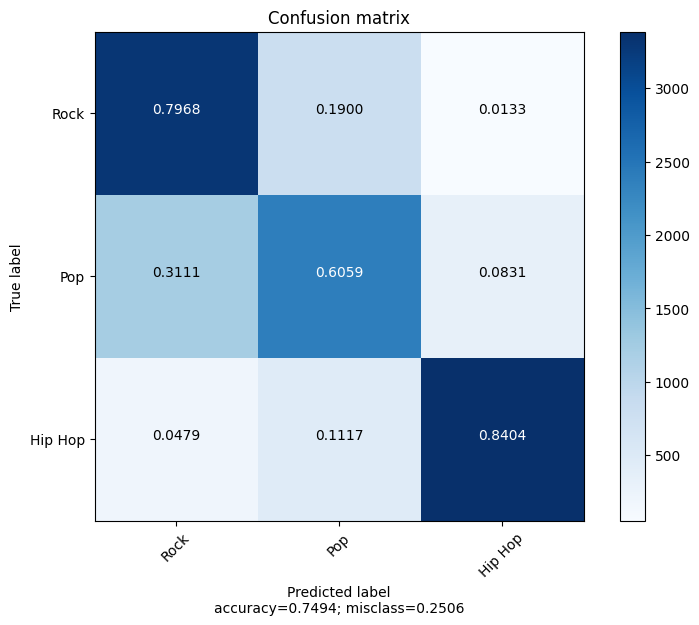

In [ ]:
genres = testing_set['Genre'].tolist()
y_tt = [(genre) for genre in genres]

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_tt, predictions)
print("LSTM GLOVE MODEL CONFUSION MATRIX")
confus_matrix(confmat,final,title='Confusion matrix', cmap=None, normalize=True)